# About the Dataset

This notebook uses a simulated dataset designed to explore how various lifestyle habits impact academic performance among students. The dataset contains 1,000 synthetic student records and over 15 features, including:

- Study hours
- Sleep patterns
- Social media usage
- Diet quality
- Mental health
- Final exam scores

Created with realistic patterns for educational practice, this dataset is ideal for:
- Machine learning projects
- Regression analysis
- Clustering
- Data visualization

Ever wondered how much Netflix, sleep, or TikTok scrolling affects your grades? 👀 This dataset simulates students' daily habits and compares them to academic outcomes. It's perfect for exploratory data analysis, ML practice, or just exploring the connections between lifestyle and GPA.

## Load and Preview Dataset

In this section, we load the CSV data using `pandas`, inspect the structure, and get a feel for what kind of variables we’re dealing with. This step helps determine appropriate preprocessing, analysis, and modeling strategies.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("student_habits_performance.csv")
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)
df.head()

Shape: (1000, 16)

Data types:
 student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


## Encode Categorical Variables

This step converts categorical features into numerical representations using techniques like one-hot encoding or label encoding, preparing the data for analysis and modeling.


In [9]:
categorical_cols = [
    "gender", "part_time_job", "diet_quality", 
    "parental_education_level", "internet_quality", 
    "extracurricular_participation"
]
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()


,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Male,gender_Other,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes
0,S1000,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,False,False,False,False,False,False,True,False,False,True
1,S1001,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,False,False,False,True,False,True,False,False,False,False
2,S1002,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,True,False,False,False,True,True,False,False,True,False
3,S1003,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,False,False,False,False,True,False,True,True,False,True
4,S1004,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,False,False,False,False,False,False,True,True,False,False


## Visualize Distributions of Habits and Performance

Here, we visualize how variables like study hours, sleep hours, and social media use are distributed among students to identify outliers and general behavior trends.


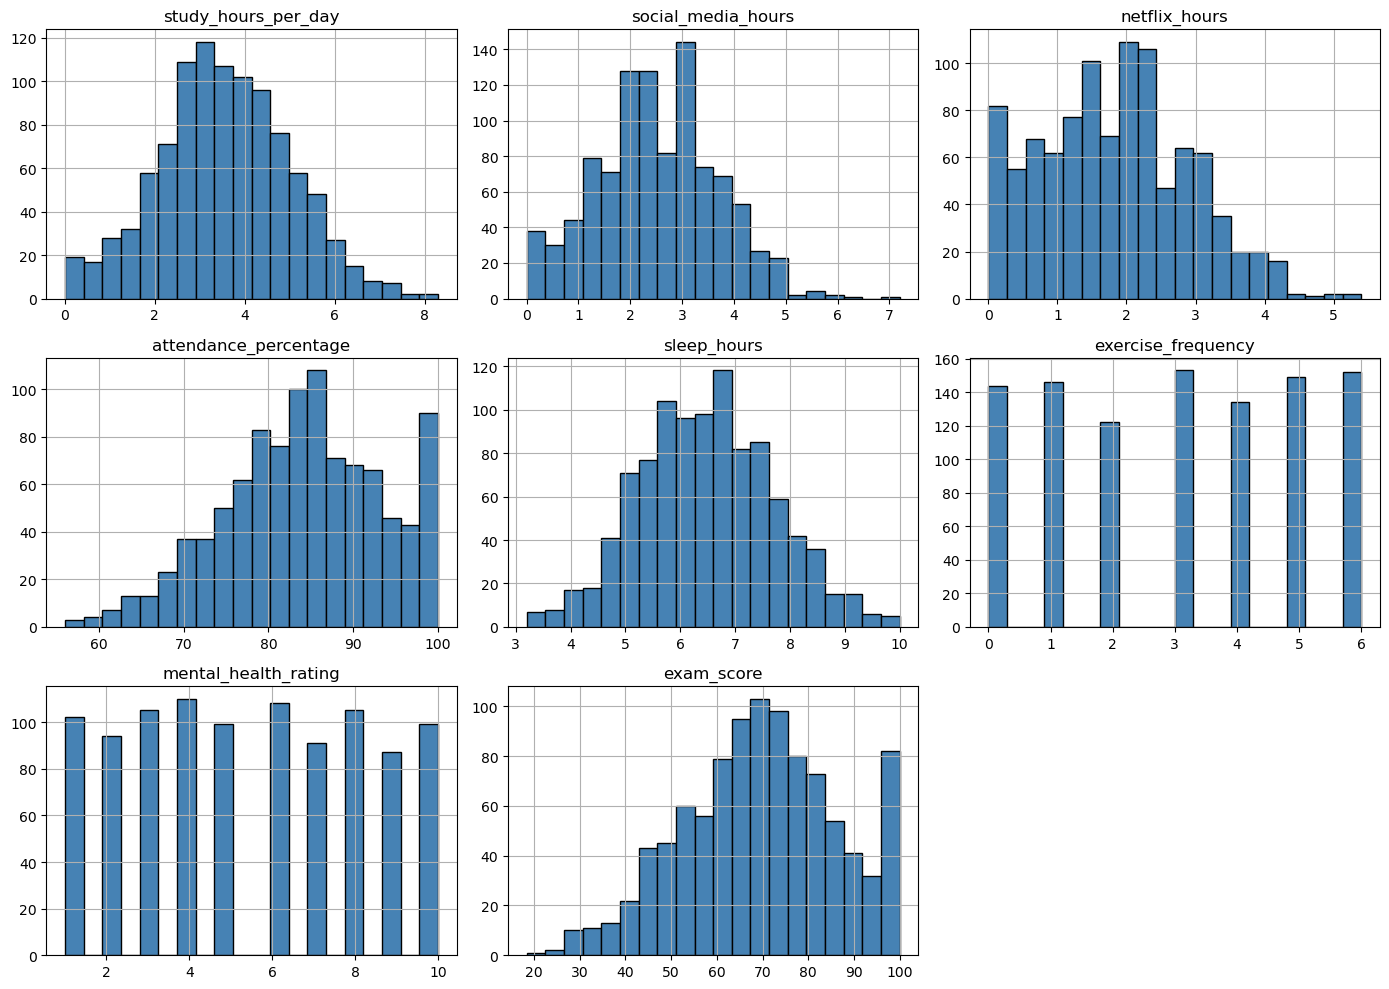

In [19]:
continuous_vars = ['study_hours_per_day', 'social_media_hours', 'netflix_hours',
                   'attendance_percentage', 'sleep_hours', 'exercise_frequency',
                   'mental_health_rating', 'exam_score']

df[continuous_vars].hist(figsize=(14, 10), bins=20, color='steelblue', edgecolor='black')
plt.tight_layout()
plt.show()
